# Data Visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
airbnb = pd.read_csv('https://raw.githubusercontent.com/dt3zjy/node/master/week-4/workshop/airbnb.csv') 
# For Seattle only

As with all new datasets, let's start by familiarizing ourselves with the dataset:

**Try it!** Print the shape, columns, and show a sample observation

In [3]:
print(airbnb.shape)
airbnb.sample()

(7237, 13)


name    host_id  \
2839  Fantastic ocean view! low price enjoy great view!  116699451   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
2839        West Seattle    Fauntleroy  47.50516 -122.38453  Entire home/apt   

      price  minimum_nights  number_of_reviews  reviews_per_month  \
2839    299              30                 83               2.39   

      calculated_host_listings_count  availability_365  
2839                               1                 0

## Scatter, Bars, and Histograms: The Basics

Some imports: Note that we'll rename `plotly express` as `px`.

`plotly express` is a "wrapper" for the base `plotly` package. What that means is we can use incredibly easy and readable functions, and plotly express will do the hard work of convering that input into formats that the software can understand.

Quick aside: If you're a web developer and love JS, or an academic and use R, the same Plotly library is available to use in both languages. 

In [4]:
import plotly
import plotly.express as px

Our overarching goal: **What are the average prices in each neighborhood?**

In order to get a handle on the data, let's use a histogram to show single distributions. How would you know what function to use?  *Google*

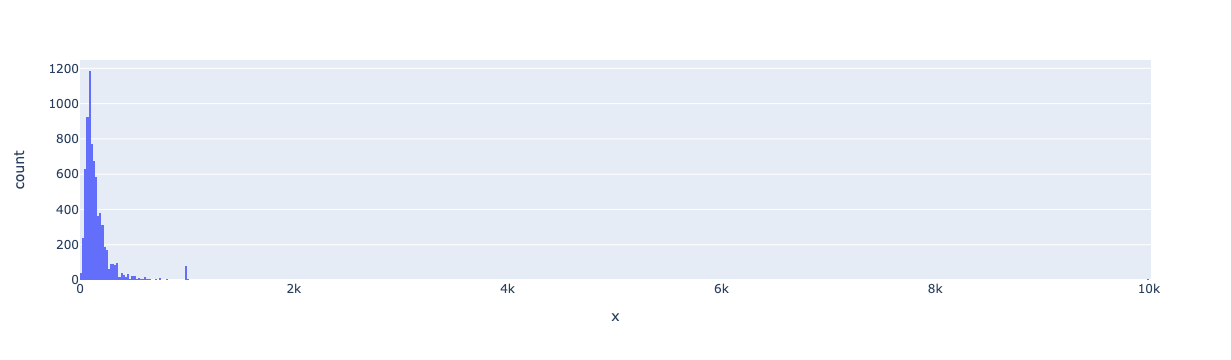

In [5]:
px.histogram(x = airbnb.price)

There's a couple of outliers here screwing with the distribution. Any idea on how to fix it?

It works, but doesn't really tell us too much. Let's modify the plot by adding some parameters.

With *any* python package, we can pull up some quick documentation from Jupyter itself using `?`
<br>**Try it!** What parameters does `px.histogram` accept?

In [6]:
# ?px.histogram

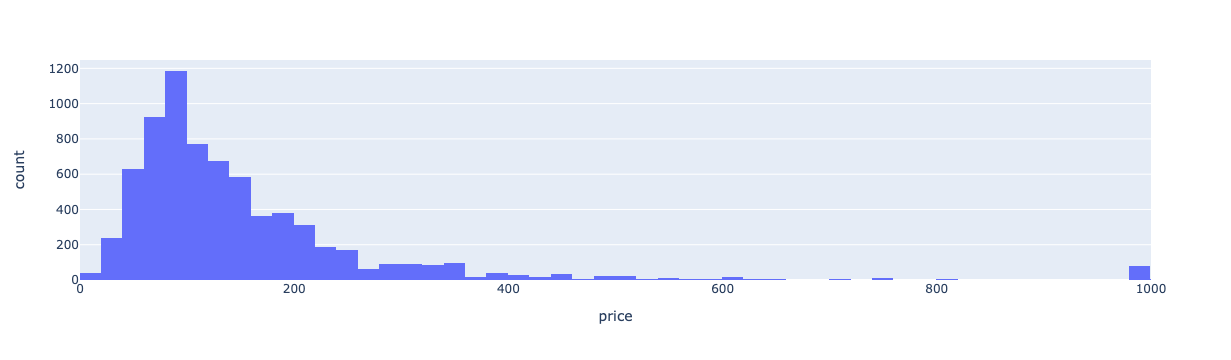

In [7]:
px.histogram(airbnb, x = 'price', range_x = [0, 1000])

How does this differ by the type of room? Use 'room_type' to break out each room type as its own distribution

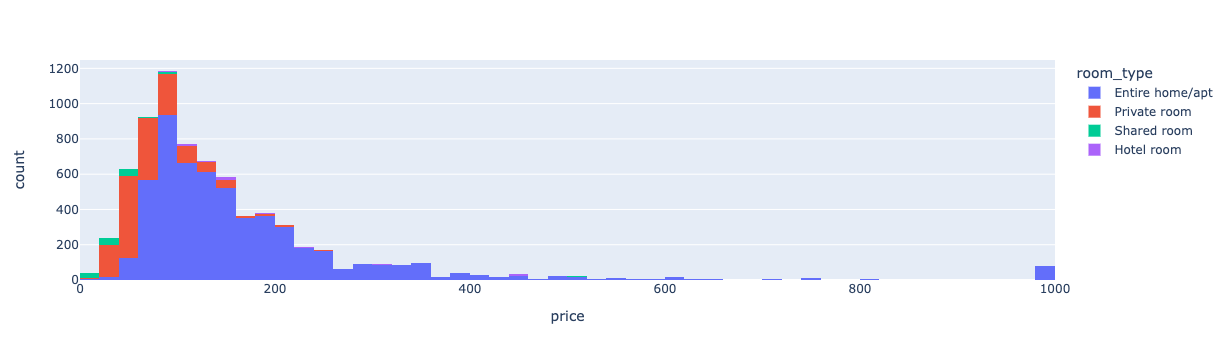

In [8]:
px.histogram(airbnb, x = 'price', range_x = [0, 1000], 
             color = 'room_type')

The current conformation stacks the values on each other, change the bar mode to lay the distrubtions over each other

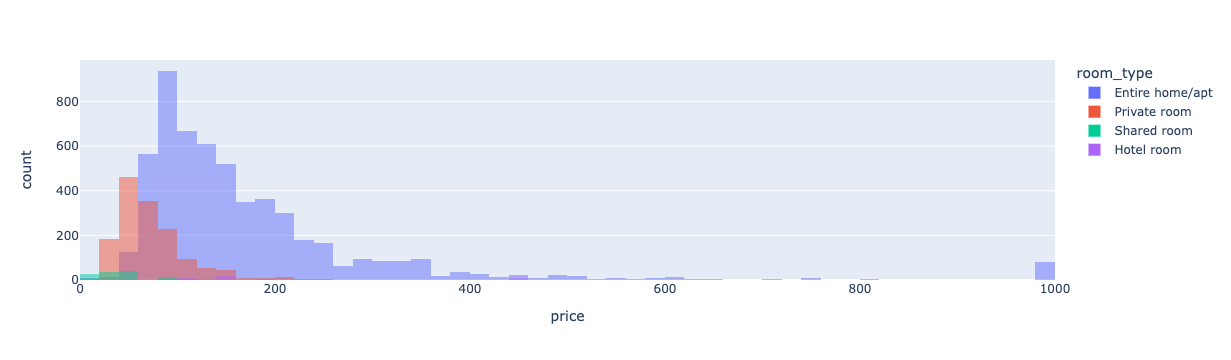

In [9]:
px.histogram(airbnb, x = 'price', range_x = [0, 1000], 
             color = 'room_type', barmode='overlay')

### Quick aesthetics

Plotly is interactive! Play around with the legends and plot area. <br>Double click on the legend icon on the right, and plotly will automatically update the figure to select those points only.

Let's use some other colors. There are two main types: **discrete sequences** and **continuous scales**. As you can imagine, if the data you're interested in has distinct groups (i.e. neighborhoods), you'd be interested in using `color_discrete_sequence=`. If the latter, use `color_continuous_sequence=`. 

How do you know what options are available? Plotly has several default options for each type.
You can check them out using `px.colors.qualitative.swatches()` for discrete options or `px.colors.sequential.swatches()` for continuous scales.



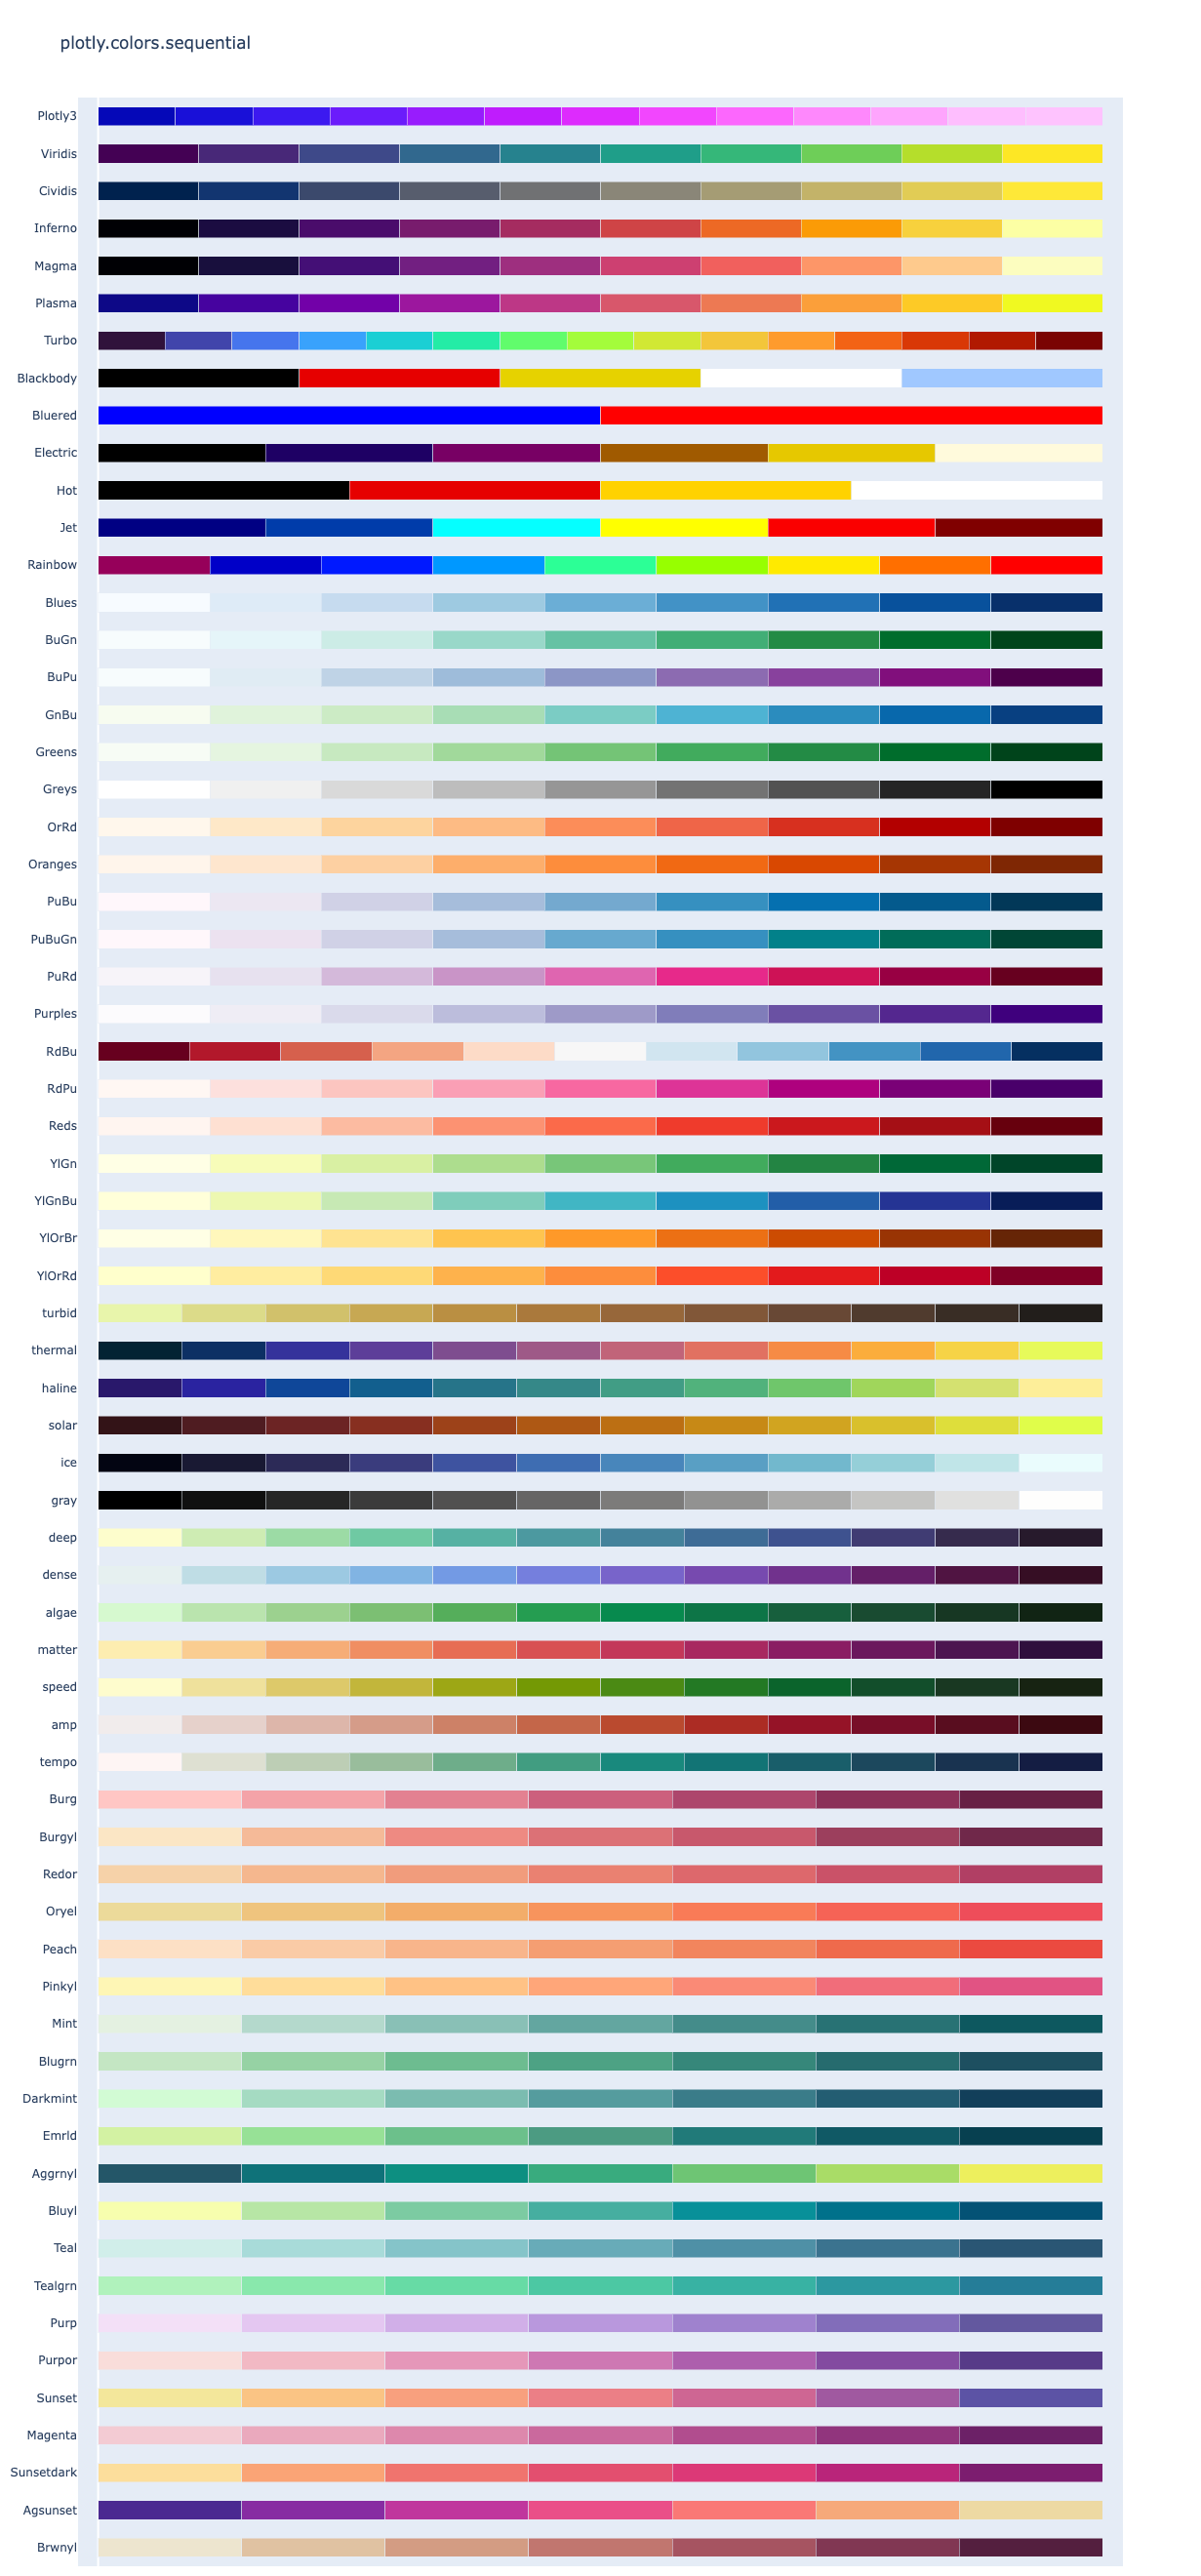

In [10]:
# px.colors.qualitative.swatches()
px.colors.sequential.swatches()

As a reminder, the `color=` parameter only breaks the graph into different colors, based upon the *attribute* (column) given. To actually change the values, we need to specify a set of colors to another parameter.  

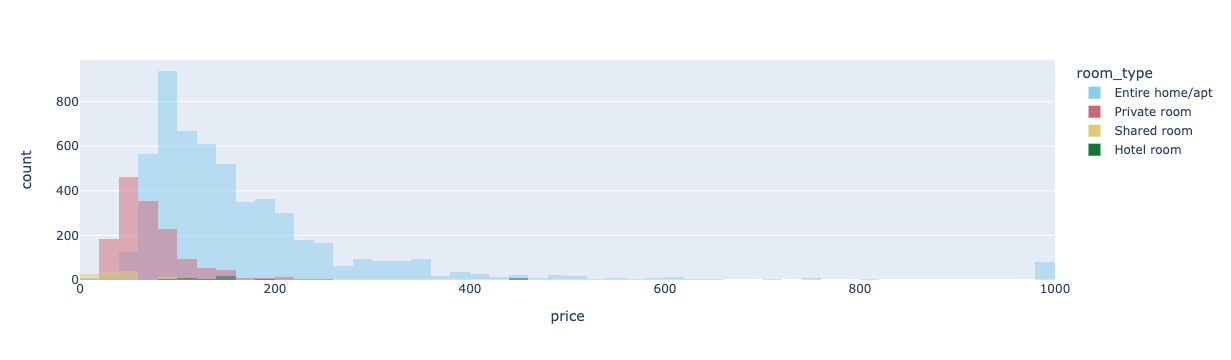

In [11]:
px.histogram(airbnb, x = 'price', range_x = [0, 1000], 
             color = 'room_type', barmode='overlay',
             color_discrete_sequence = px.colors.qualitative.Safe
            )

Finally, we can add labels to our charts as dictionaries, in the form of `labels={'column_name':'Column Name', 'another_name':'Another Name'}`

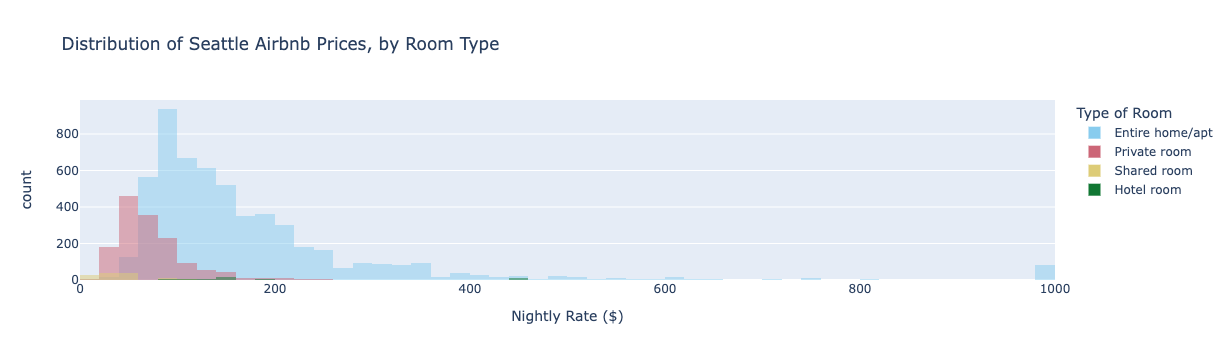

In [12]:
px.histogram(airbnb, x = 'price', range_x = [0, 1000], 
             color = 'room_type',
             barmode='overlay',
             color_discrete_sequence = px.colors.qualitative.Safe,
             title='Distribution of Seattle Airbnb Prices, by Room Type',
             labels = {'price':'Nightly Rate ($)', 'room_type':'Type of Room'}
            )

Say we want to adjust this plot to show *relative* values. That is, we want to better highlight the price distributions of hotel rooms, even though they occur a lot less than enitre homes/apts.

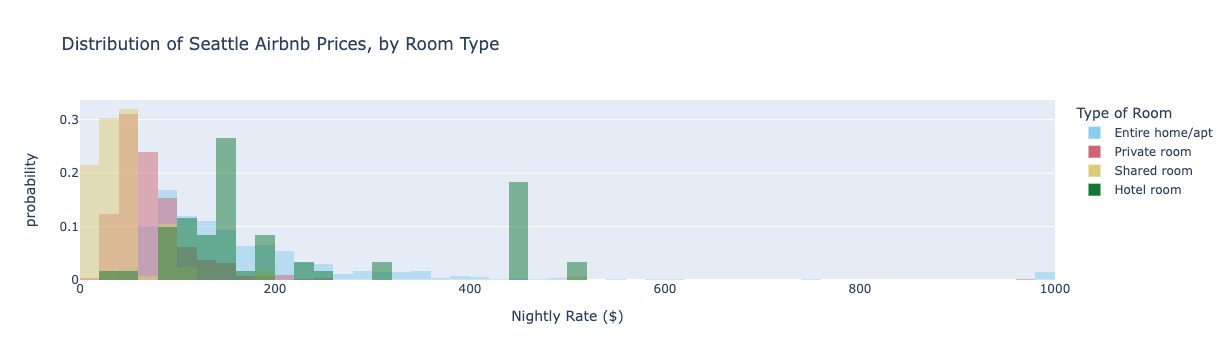

In [13]:
fig = px.histogram(airbnb, x = 'price', range_x = [0, 1000], 
             color = 'room_type',
             barmode='overlay', histnorm = 'probability',
             color_discrete_sequence = px.colors.qualitative.Safe,
             title='Distribution of Seattle Airbnb Prices, by Room Type',
             labels = {'price':'Nightly Rate ($)', 'room_type':'Type of Room'}
            )
fig.show()

### Using GroupBys for Aggregation

Oftentimes we'll want to create visualizations at some aggregate level. 

For example, let's say we want to show neighborhoods with a high median rental price. 
<br>Our data is at a *per-listing* level, meaning that each individual row is its own listing, with its price. 
<br>To get data at the *per-neighborhood* level, we've got to *roll up* all the listing prices per neighborhood, in other words, group the data by neighborhood, then find the median for all those listings.

In [14]:
airbnb_byN = airbnb.groupby(by=['neighbourhood','neighbourhood_group']).agg('median').reset_index()
airbnb_byN.head(3)

neighbourhood neighbourhood_group     host_id   latitude  longitude  price  \
0          Adams             Ballard  25139423.0  47.671920 -122.38498  107.0   
1           Alki        West Seattle  48206652.5  47.575725 -122.40784  112.5   
2  Arbor Heights        West Seattle  55322823.5  47.511915 -122.37911  109.5   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             2.0               31.0               1.90   
1             2.0               34.5               2.02   
2             2.0               29.5               1.70   

   calculated_host_listings_count  availability_365  
0                             1.0             113.0  
1                             1.0             113.5  
2                             1.0             143.0

In [15]:
airbnb_byN = airbnb_byN.drop(columns=['host_id','latitude', 'longitude'])
airbnb_byN.head(3)

neighbourhood neighbourhood_group  price  minimum_nights  \
0          Adams             Ballard  107.0             2.0   
1           Alki        West Seattle  112.5             2.0   
2  Arbor Heights        West Seattle  109.5             2.0   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0               31.0               1.90                             1.0   
1               34.5               2.02                             1.0   
2               29.5               1.70                             1.0   

   availability_365  
0             113.0  
1             113.5  
2             143.0

In breakout groups, see if you can **build a bar plot** to show median prices in each neighbourhood group, and sort them in a meaningful way

Make it complete! Label axes, hover text, color, the whole nine yards.

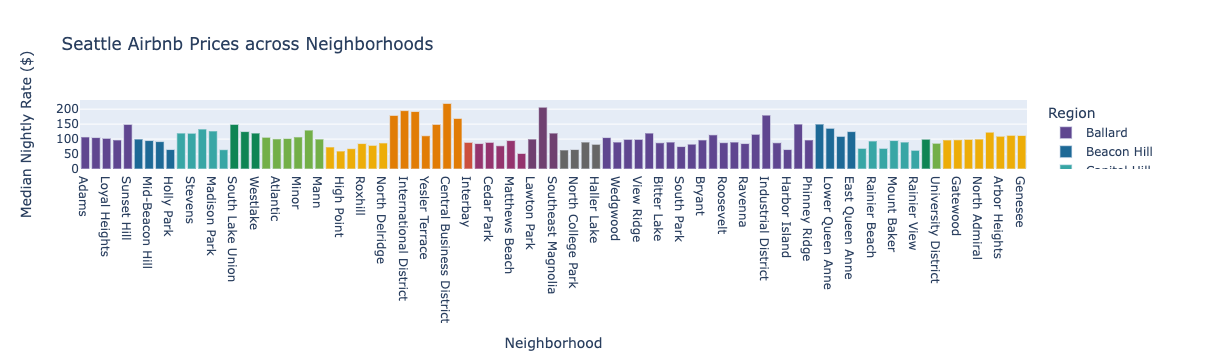

In [16]:
fig = px.bar(airbnb_byN.sort_values(by='neighbourhood_group'), 
             x='neighbourhood', y='price',
             log_y=False,
             color='neighbourhood_group',
             hover_name='neighbourhood_group',
             color_discrete_sequence=plotly.colors.qualitative.Prism, 
             title='Seattle Airbnb Prices across Neighborhoods',
             labels={'availability_365':'Days Available Per Year',
                     'price':'Median Nightly Rate ($)',
                     'neighbourhood':'Neighborhood',
                     'neighbourhood_group':'Region'
                    },
            )
fig.show()

Say my friend and I have a budget of of $90 per night. Show which regions are ideal for this, but how you wanna do that is entirely up to you: Draw a **horizontal line**, color the bars by color the ideal regions differently, as long as it communicates the which neighborhoods are generally cheaper.


**Hint**: To draw a line, use `fig.add_hline()` with corresponding parameters
<br>**Hint**: To color bars according to some condition, first **create a new column** that describes if the value is below budget.

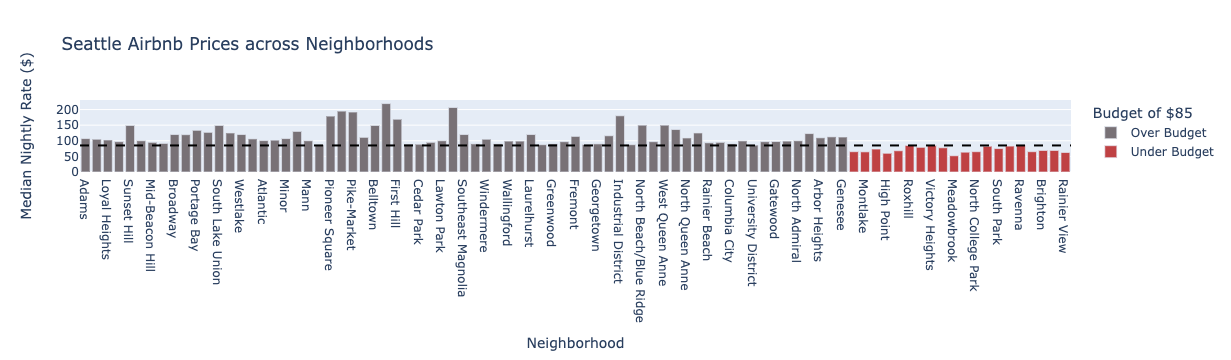

In [17]:
budget_value = 85
airbnb_byN['budget'] = airbnb_byN.price <= budget_value
airbnb_byN['budget'] = airbnb_byN['budget'].map({True:'Under Budget', False:'Over Budget'})

fig = px.bar(airbnb_byN.sort_values(by='neighbourhood_group'), 
             x='neighbourhood', y='price',
             log_y=False,
             color='budget',
             hover_name='neighbourhood_group',
             color_discrete_sequence=['rgb(120,113,118)', 'rgb(191,65,67)'], 
             title='Seattle Airbnb Prices across Neighborhoods',
             labels={'availability_365':'Days Available Per Year',
                     'price':'Median Nightly Rate ($)',
                     'neighbourhood':'Neighborhood',
                     'neighbourhood_group':'Region',
                     'budget':'Budget of ${}'.format(budget_value)
                    },
            )

fig.add_hline(y=budget_value, line_width=2, line_dash="dash", line_color="black")
fig.show()

## Time Trends

Tabular data comes in two formats: *wide* or *long*.

Wide form puts the core observational unit as it's own row, while long-form data shows each possible data combination *as its own row*. In practice, wide data is more human-readable, while long form data tends to lend itself better for visualization tasks. 

Pandas gives us a set of functions to switch back and forth between the two formats, as needed.

Let's use the Zillow dataset to explore this further. Our overarching goal is to **show price trends in Seattle neighborhoods**.

In [18]:
zillow = pd.read_csv('https://raw.githubusercontent.com/dt3zjy/node/master/week-4/workshop/zillow.csv') 
# For Seattle only

In [19]:
print(zillow.shape)
zillow.head(3)

(260, 120)


RegionID      RegionName     City State                    Metro  \
0    271985       South End   Tacoma    WA  Seattle-Tacoma-Bellevue   
1    250206    Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
2    273587  Eastside-ENACT   Tacoma    WA  Seattle-Tacoma-Bellevue   

      CountyName  SizeRank  2010-09  2010-10  2010-11  ...  2019-04  2019-05  \
0  Pierce County       262   1153.0   1168.0   1188.0  ...   1420.0   1422.0   
1    King County       320   1372.0   1401.0   1429.0  ...   2138.0   2146.0   
2  Pierce County       356   1218.0   1242.0   1263.0  ...   1451.0   1458.0   

   2019-06  2019-07  2019-08  2019-09  2019-10  2019-11  2019-12  2020-01  
0   1427.0   1435.0   1445.0   1454.0   1465.0   1480.0   1490.0   1517.0  
1   2162.0   2181.0   2199.0   2210.0   2195.0   2183.0   2192.0   2169.0  
2   1468.0   1478.0   1486.0   1492.0   1496.0   1504.0   1519.0   1547.0  

[3 rows x 120 columns]

What regions are covered in the zillow data set? 

In [20]:
zillow.Metro.unique()

array(['Seattle-Tacoma-Bellevue', 'Spokane-Spokane Valley',
       'Portland-Vancouver-Hillsboro', 'Bellingham', 'Yakima', 'Longview',
       'Port Angeles', 'Olympia-Tumwater'], dtype=object)

Let's subset our data to just Seattle

In [21]:
zillow = zillow[zillow.City == 'Seattle']

### Moving from wide to long form

In [22]:
zillow.columns.values[1:10]

array(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       '2010-09', '2010-10', '2010-11'], dtype=object)

A quick bit of cleaning is necessary here. Right now, each row in zillow represents a unique region, and the Zillow Rental Index (ZRI) value for each month is given in its own column (113 months = 113 columns). For visualization, we'd like each **region - month combination to be its own row**.

Look at the [Pandas cheatsheet]() to see what the relevant operation should be.

![Pandas Cheatsheet](pd-reshape.png)

Let's use `pd.melt()` to move from wide to long, making sure to google to documentation along the way. 

To make this more tangible, our goal is to convert our wide data in the form of: 
<br>`RegionName | 2010-09 | 2010-10 | 2010-11 ... ` to the long form
<br>`RegionName | Date | ZRI`.

**Hint**: RegionID through SizeRank are all *ID variables*. This means that they are unique to each observation, and should not be dropped or pivoted in the transformation. 

In [23]:
ZRI = pd.melt(zillow, 
              id_vars=['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'], 
              var_name='Date', 
              value_name='ZRI')

ZRI.head()

RegionID           RegionName     City State                    Metro  \
0    250206         Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
1    272001  University District  Seattle    WA  Seattle-Tacoma-Bellevue   
2    271990             Magnolia  Seattle    WA  Seattle-Tacoma-Bellevue   
3    250788            Greenwood  Seattle    WA  Seattle-Tacoma-Bellevue   
4    252248          Wallingford  Seattle    WA  Seattle-Tacoma-Bellevue   

    CountyName  SizeRank     Date     ZRI  
0  King County       320  2010-09  1372.0  
1  King County       449  2010-09  1313.0  
2  King County       725  2010-09  1632.0  
3  King County       746  2010-09  1223.0  
4  King County       752  2010-09  1562.0

Let's take a look at a particular region, say Capitol Hill. 

In [24]:
ZRI[ZRI.RegionName == 'Capitol Hill']

RegionID    RegionName     City State                    Metro  \
0       250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
76      250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
152     250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
228     250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
304     250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
...        ...           ...      ...   ...                      ...   
8208    250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
8284    250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
8360    250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
8436    250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   
8512    250206  Capitol Hill  Seattle    WA  Seattle-Tacoma-Bellevue   

       CountyName  SizeRank     Date     ZRI  
0     King County       320  2010-09  1372.0  
76    King County       320  2010-10  1401.0  
152   King County       320  2010-11  1429.0  
228   King County       320  2010-12  1446.0  
304   King County       320  2011-01  1455.0  
...           ...       ...      ...     ...  
8208  King County       320  2019-09  2210.0  
8284  King County       320  2019-10  2195.0  
8360  King County       320  2019-11  2183.0  
8436  King County       320  2019-12  2192.0  
8512  King County       320  2020-01  2169.0  

[113 rows x 9 columns]

#### Interpolating Data

Because of missing datapoints, we have to interpolate some values, or make a best guess based on values before or after the gap

In [25]:
date_idx = pd.date_range(start='2011-01-01', end='2020-01-01', freq='MS')

def fill_timeseries(df):
    df2 = df.set_index(pd.to_datetime(df['Date'])).drop(columns='Date')
    df3 = df2.reindex(date_idx, fill_value=np.nan)
    return df3.reset_index()

In [26]:
ZRI2 = ZRI.groupby(by=['RegionID']).apply(fill_timeseries).reset_index(drop=True).rename(columns={'index':'Date'})
ZRI2['ZRI'] = ZRI2.ZRI.interpolate(method='linear')
ZRI2

Date  RegionID RegionName     City State                    Metro  \
0    2011-01-01     56654    Seaview  Seattle    WA  Seattle-Tacoma-Bellevue   
1    2011-02-01     56654    Seaview  Seattle    WA  Seattle-Tacoma-Bellevue   
2    2011-03-01     56654    Seaview  Seattle    WA  Seattle-Tacoma-Bellevue   
3    2011-04-01     56654    Seaview  Seattle    WA  Seattle-Tacoma-Bellevue   
4    2011-05-01     56654    Seaview  Seattle    WA  Seattle-Tacoma-Bellevue   
...         ...       ...        ...      ...   ...                      ...   
8279 2019-09-01    344034  Riverview  Seattle    WA  Seattle-Tacoma-Bellevue   
8280 2019-10-01    344034  Riverview  Seattle    WA  Seattle-Tacoma-Bellevue   
8281 2019-11-01    344034  Riverview  Seattle    WA  Seattle-Tacoma-Bellevue   
8282 2019-12-01    344034  Riverview  Seattle    WA  Seattle-Tacoma-Bellevue   
8283 2020-01-01    344034  Riverview  Seattle    WA  Seattle-Tacoma-Bellevue   

       CountyName  SizeRank     ZRI  
0     King County      3524  1542.0  
1     King County      3524  1528.0  
2     King County      3524  1503.0  
3     King County      3524  1477.0  
4     King County      3524  1452.0  
...           ...       ...     ...  
8279  King County      4171  2129.0  
8280  King County      4171  2169.0  
8281  King County      4171  2112.5  
8282  King County      4171  2056.0  
8283  King County      4171  2039.0  

[8284 rows x 9 columns]

### Making a Time Series Plot

Now that we've got data in a long format, we can easily use plotly express functions to create a time series. Say I'm interested in the following neighborhoods: `'Denny Triangle', 'First Hill', 'Capitol Hill', 'Belltown', 'Uptown'`. Plot the time trends, and make it pretty. 

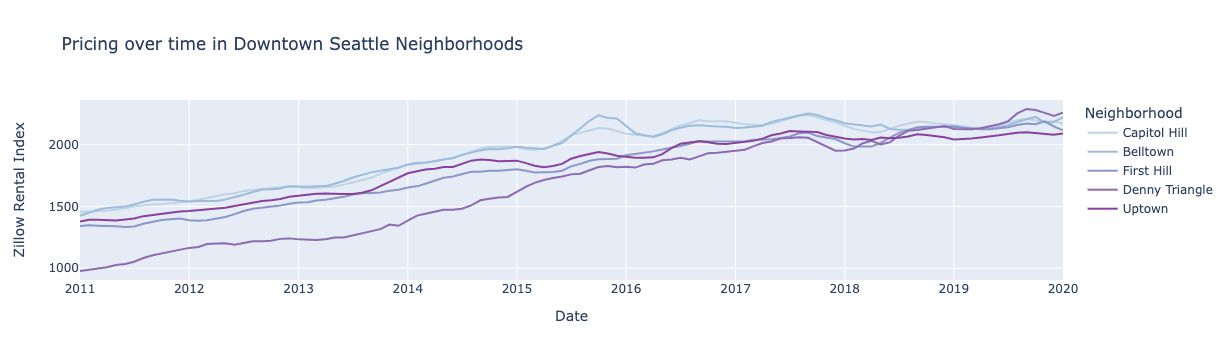

In [27]:
hoods = ['Denny Triangle', 'First Hill', 'Capitol Hill', 'Belltown', 'Uptown']
px.line(ZRI2[ZRI2.RegionName.isin(hoods)], x='Date', y='ZRI', 
        color='RegionName', 
        labels={'ZRI':'Zillow Rental Index', 
                                    'RegionName':'Neighborhood'},
        title='Pricing over time in Downtown Seattle Neighborhoods',
        color_discrete_sequence = plotly.colors.sequential.BuPu[2:]
             )


## Advanced Topics: Geographic Plots

There's quite a few different ways to show geogrpahical data, usually with choropleth charts or scatter plots.
<br>Our friend Plotly has them all: https://plotly.com/python/maps/

A quick note about how this work before letting you leaf through the docs page.

<br> Most of the params in `px.scatter_mapbox()` behave pretty similarly to `px.scatter`, except that we provide **latitude and longitude data** instead of `x` and `y`. Luckily, our dataset already has that included, but oftentimes we'll have to find a lookup table online to convert city names, for example, to lat / lon coordinates. 

<br>We don't necessarily have to provide a value to `size=`, but that usually can help highlight points of interest.
<br> `zoom=` on the other hand, just changes how zoomed in the initial picture is when first loaded.

<br>Finally, we'll have to update the `mapbox_style=` parameter of the figure to a specific base map to load. 
<br>For more information on what options are available here, check out https://plotly.com/python/mapbox-layers/

In [28]:
airbnb['budget'] = (airbnb.price <= budget_value).map({True:'Under Budget', False:'Over Budget'})

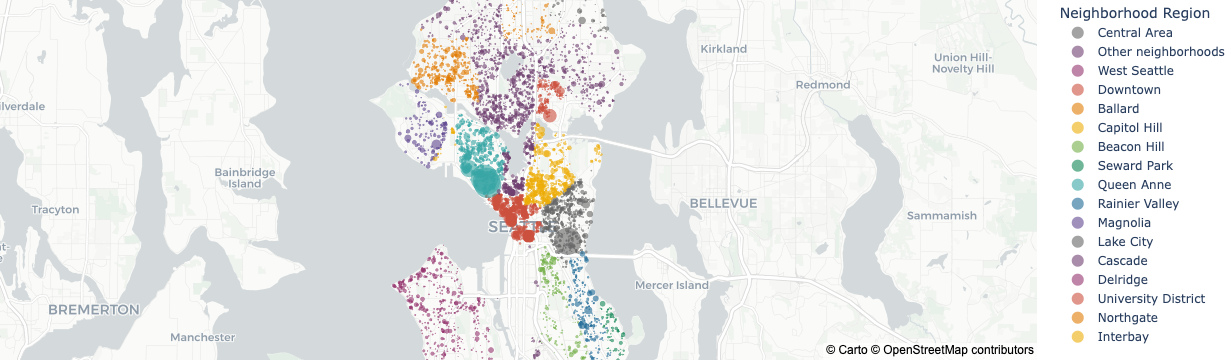

In [29]:
fig = px.scatter_mapbox(airbnb, lat='latitude', lon='longitude', 
                        color='neighbourhood_group', size='price', opacity=.6,
                        hover_name='name',hover_data=['neighbourhood','budget'],
                        color_discrete_sequence=plotly.colors.qualitative.Prism_r, 
                        zoom=10, labels={'availability_365':'Days Available Per Year',
                                         'price':'Median Nightly Rate ($)',
                                         'neighbourhood':'Neighborhood',
                                         'neighbourhood_group':'Neighborhood Region',
                                         'budget':'Budget of ${}'.format(budget_value),
                                         'latitude':'Lat', 'longitude':'Lon'
                                        },
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Show places in Downtown, Central Area, and Capitol Hill, and highlight those under budget

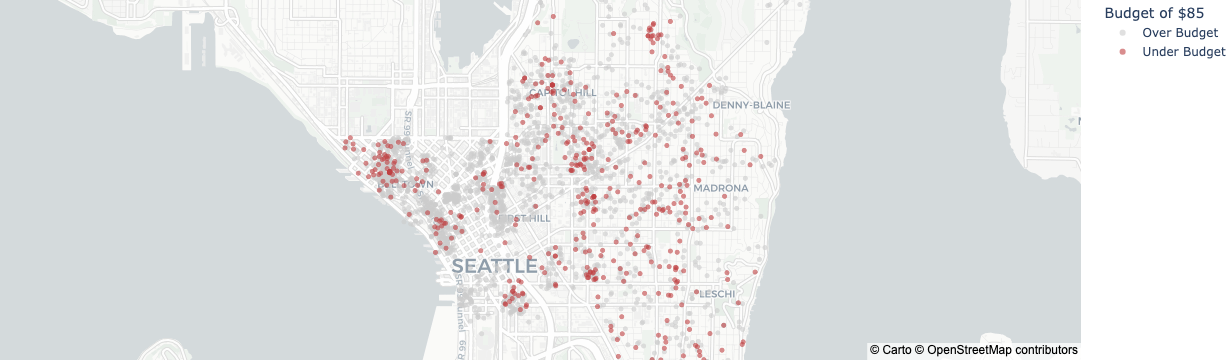

In [30]:
fig = px.scatter_mapbox(airbnb[airbnb.neighbourhood_group.isin(['Downtown', 'Central Area','Capitol Hill'])], 
                        lat='latitude', lon='longitude', 
                        color='budget', opacity=.6,
                        hover_name='name',hover_data=['price','neighbourhood','budget'],
                        color_discrete_map={'Over Budget':'rgb(204,204,204)', 'Under Budget':'rgb(191,65,67)'}, 
                        zoom=12, labels={'availability_365':'Days Available Per Year',
                                         'price':'Median Nightly Rate ($)',
                                         'neighbourhood':'Neighborhood',
                                         'neighbourhood_group':'Neighborhood Region',
                                         'budget':'Budget of ${}'.format(budget_value),
                                         'latitude':'Lat', 'longitude':'Lon'
                                        },
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()